# Huiswerkopdracht - Boekclassificatie

### Notebook van Esmee Kraan

**Disclaimer**: Stukken code in dit notebook zijn geschreven met ChatGPT, boven deze code staat dit vermeld met de context en wat voor prompt is gebruikt.

---

## Table of contents

1. [Introduction](#Introduction)

2. [The problem domain](#The-problem-domain)

4. [Business Understanding](#Business-Understanding)

5. [Required libraries](#Required-libraries)

6. [Data Understanding](#Data-Understanding)

7. [Data Prepartion](#Data-Preparation)

8. [Modeling](#Modeling)

9. [Evaluation](#Evaluation)

10. [Reproducibility](#Reproducibility)

---

# Introduction

[[ go back to the top ]](#Table-of-contents)

In deze huiswerkopdracht ga ik verder met de technieken die ik heb geleerd tijdens de werkcolleges. We hebben ons toen gericht op sentimentanalyse van IMDB-reviews, en nu ga ik aan de slag met boekteksten van Project Gutenberg. Dit is een online archief met meer dan 60.000 gratis boeken, wat supertof is! Het doel van deze opdracht is om een neuraal netwerk te bouwen dat kan voorspellen in welk genre een boek zich bevindt, op basis van tekstuele samples van 600 woorden. Dit is een geweldige kans om machine learning toe te passen op een nieuwe dataset en meer te leren over tekstclassificatie.

---


# The problem domain

[[ go back to the top ]](#Table-of-contents)

Boeken indelen in verschillende genres is echt belangrijk binnen de literatuur- en informatiekunde. Het maakt het voor lezers veel makkelijker om boeken te vinden die bij hun interesses passen. In dit project gebruik ik tekstuele samples van boeken van Project Gutenberg, die zijn opgedeeld in stukjes van 600 woorden. De genres zijn gecategoriseerd volgens de Library of Congress Classificatie.

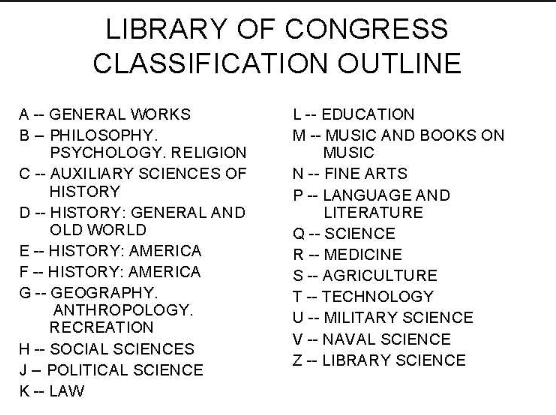

Met meer dan 1,59 miljoen records is het een flinke klus om te bekijken hoe goed mijn model kan voorspellen. Het is wel een uitdaging, vooral omdat de genres niet gelijk verdeeld zijn en er veel variatie is in schrijfstijlen en onderwerpen binnen elk genre.

---

# Business Understanding

[[ go back to the top ]](#Table-of-contents)

Het doel van deze opdracht is om een model te bouwen dat efficiënt en effectief het genre van een boek kan voorspellen aan de hand van de tekst. Dit is waardevol voor bibliotheken, boekwinkels en online platforms, omdat het aanbevelingen aan gebruikers verbetert en zo de klanttevredenheid en verkoop kan verhogen.

**Wat gaan we oplossen?**
> Ik wil een neuraal netwerk ontwikkelen dat het genre van een boek kan voorspellen op basis van de inhoud.

**KSF's van het project?**
> De Kritische Succesfactoren (KSF's) zijn onder andere de nauwkeurigheid van het model, de snelheid van classificatie, en de gebruiksvriendelijkheid van de applicatie. Het project is succesvol als het model met hoge nauwkeurigheid kan classificeren en makkelijk te integreren is in bestaande systemen.

**De context van de vraag van de klant?**  
> De klant vraagt om een systeem dat boeken kan classificeren. Dit helpt bij het verbeteren van aanbevelingssystemen, wat super belangrijk is voor klanttevredenheid en verkoop.

**Ontwerp of een Eindvisie**  
> Ik wil uiteindelijk een gebruiksvriendelijke interface creëren die mensen in staat stelt om boeken te classificeren en aanbevelingen te doen op basis van genres.

**Kan de vraag opgelost worden met de huidige data?**  
> De data is voldoende om een goed model te trainen, maar ik moet wel rekening houden met de ongelijke verdeling van de genres en de verschillende schrijfstijlen.

# Vereiste Bibliotheken

[[ ga terug naar de bovenkant ]](#Inhoudsopgave)

*Hier is een korte uitleg over de packages die ik gebruik om dit project werkend te krijgen. Dit is een voorbeeld van een random notebook online:*

Als je Python nog niet op je computer hebt staan, kun je de [Anaconda Python-distributie](http://continuum.io/downloads) gebruiken om de meeste benodigde Python-packages te installeren. Anaconda biedt een eenvoudige installer die je met een dubbelklik kunt gebruiken.

Dit notebook maakt gebruik van verschillende Python-packages die standaard worden meegeleverd met de Anaconda Python-distributie. De belangrijkste bibliotheken die ik zal gebruiken zijn:

* **NumPy**: Biedt een snelle numerieke array-structuur en hulpfuncties.
* **pandas**: Biedt een DataFrame-structuur om gegevens in het geheugen op te slaan en er gemakkelijk en efficiënt mee te werken.
* **scikit-learn**: Het essentiële machine learning-pakket in Python.
* **matplotlib**: Een basis plotbibliotheek in Python; de meeste andere Python-plotbibliotheken zijn hierop gebouwd.
* **Seaborn**: Een geavanceerde bibliotheek voor statistische visualisaties.
* **sounddevice**: Een bibliotheek voor het verwerken en beheren van audiogegevens (indien relevant voor het project).
* **tqdm**: Een bibliotheek voor het maken van voortgangsbalken in loops.

Om ervoor te zorgen dat je alle benodigde packages hebt, kun je ze installeren met `conda` of `pip`:

```bash
conda install numpy pandas scikit-learn matplotlib seaborn tqdm
pip install numpy pandas scikit-learn matplotlib seaborn tqdm
```

In [4]:
# Data Manipulation and Analysis
import pandas as pd  # type: ignore
import numpy as np  # type: ignore

# Machine Learning and Data Preprocessing
from sklearn.preprocessing import LabelEncoder  # type: ignore
from sklearn.model_selection import train_test_split  # type: ignore

# Visualization
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore

# System and File Management
import sys
import os
import time

# AI packages
import tensorflow as tf  # type: ignore
from tensorflow import keras  # type: ignore
from tensorflow.keras import layers  # type: ignore

# Natural Language Processing
import spacy  # type: ignore

# Progress Bar
from tqdm import tqdm  # type: ignore

ModuleNotFoundError: No module named 'distutils'

In [6]:
df_val = pd.read_csv('dataset/validation.csv.gz')
df_test = pd.read_csv('dataset/testing.csv.gz')
df_training = pd.read_csv('dataset/training.csv.gz')

# Data Understanding

[[ go back to the top ]](#Table-of-contents)

---

In [10]:
print(df_training.head())
print(df_val.head())
print(df_test.head())

,usage,main genre,title,samplenumber,txt
0,train,American Literature,"The Works of John Greenleaf Whittier, Volume V...",600,journey more terrible than that of the ideal p...
1,train,American Literature,"The Works of John Greenleaf Whittier, Volume V...",1200,great struggle for freedom but a soldier of th...
2,train,American Literature,"The Works of John Greenleaf Whittier, Volume V...",1800,says overrun with superstition on one occasion...
3,train,American Literature,"The Works of John Greenleaf Whittier, Volume V...",2400,practice of swearing although previously he te...
4,train,American Literature,"The Works of John Greenleaf Whittier, Volume V...",3000,all manner of uncleanness he would laugh at al...


Op t eerste zicht zie ik geen ontbrekende of verkeerde waarde, de datasetes zijn vrij duidelijk ingedeeld met hun usage er zelfs bij vermeld. Maar ik weet nog niet zeker of de dataset schoon is daarom ga ik verder kijken.

In [ ]:
print(df_training.info())
print(df_val.info())
print(df_test.info())

# Data Preparation

[[ go back to the top ]](#Table-of-contents)

*Simpel gezegd opschonen van je data tot het punt dat je het in een model kan stoppen, kan soms heel klein zijn of heel veel. Hier geldt ook weer, elke stap onderbouwen*

---

# Modeling

[[ go back to the top ]](#Table-of-contents)

*Korte uitleg wat voor model je gebruikt en waarom*

---

# Evaluation 

[[ go back to the top ]](#Table-of-contents)

*Doormiddel van visualisaties laten zien waarom het wel of niet werkt en benoem de vervolgstappen voor vervolg onderzoek*

---

# Reproducibility

[[ go back to the top ]](#Table-of-contents)

*Als je notebook niet nagemaakt kan worden is het een slecht notebook, wat je hier kan benoemen is dat er een requirements.txt is met de versies en een compacte versie van je code in 1 codeblock*

---

Je kan dit ook nog toevoegen:

<div class="alert alert-block alert-success"><b>Success:</b> This alert box indicates a successful or positive action.</div>

<div class="alert alert-block alert-warning"><b>Example:</b> Use yellow boxes for examples that are not inside code cells, or use for mathematical formulas if needed. Typically also used to display warning messages.</div>

<div class="alert alert-block alert-info"><b>Tip:</b> Use blue boxes (alert-info) for tips and notes.</div>

<div class="alert alert-block alert-danger"><b>Danger:</b> This alert box indicates a dangerous or potentially negative action.</div>

Zo'n markdown block is gewoon HTML-code